In [200]:
# Numpy and Scipy: needed for numerical analysis and statistics
import numpy as np
import scipy.stats as stats

# scipy.special: mostly not needed - only to showcase binomial calculation
from scipy.special import comb

# matplotlib und seaborn: needed for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Option to make plots visually more appealing
plt.rc("axes.spines", top=False, right=False)


# Code for Chapter 02 

## Introduction

### Notation

What will we cover:

- vectors and matrices using `numpy`
- example use case

In [87]:
vector = np.array([1,2,3,4])
vector

array([1, 2, 3, 4])

In [88]:
vector.shape

(4,)

In [89]:
matrix = np.array([[1,2,3],[4,5,6],[7,8,9], [10,11,12]])

In [90]:
matrix

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [91]:
matrix.shape

(4, 3)

### Excercise

In [92]:
v1 = np.array((2,3,7))

In [93]:
v2 = np.array((-3,5,9))

In [94]:
m1 = np.array([[1,2,12],[4,3,9]])
m1

array([[ 1,  2, 12],
       [ 4,  3,  9]])

In [95]:
m2 = np.array((v1,v2))
m2

array([[ 2,  3,  7],
       [-3,  5,  9]])

In [96]:
m3 = m1 + m2
m3

array([[ 3,  5, 19],
       [ 1,  8, 18]])

### Why useful

In [97]:
beta0 = 869
beta1 = 100
x = np.array((35,45,65))
x

array([35, 45, 65])

In [98]:
yhat = beta0 + beta1*x
yhat

array([4369, 5369, 7369])

In pure matrix expression this could be writen as 

$$\hat{y} = \begin{pmatrix}
1 & 35 \\
1 &45\\
1 &65
\end{pmatrix} \begin{pmatrix}
869 \\
100 \\
\end{pmatrix}$$

or even more abstract as 
  
$$\hat{y} = X\hat{\beta}$$


In [99]:
x = np.c_[np.ones(3),np.array((35,45,65))]
betas = np.array([beta0,beta1])

In [100]:
x.shape, betas.shape

((3, 2), (2,))

In [102]:
yhat = x@betas # Matrix multiplication (dot product)
yhat

array([4369., 5369., 7369.])

### Graphing a line

In [103]:
xs = np.arange(1900,2001)
xs

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000])

In [104]:
y = 1007 - 0.39*xs
y

array([266.  , 265.61, 265.22, 264.83, 264.44, 264.05, 263.66, 263.27,
       262.88, 262.49, 262.1 , 261.71, 261.32, 260.93, 260.54, 260.15,
       259.76, 259.37, 258.98, 258.59, 258.2 , 257.81, 257.42, 257.03,
       256.64, 256.25, 255.86, 255.47, 255.08, 254.69, 254.3 , 253.91,
       253.52, 253.13, 252.74, 252.35, 251.96, 251.57, 251.18, 250.79,
       250.4 , 250.01, 249.62, 249.23, 248.84, 248.45, 248.06, 247.67,
       247.28, 246.89, 246.5 , 246.11, 245.72, 245.33, 244.94, 244.55,
       244.16, 243.77, 243.38, 242.99, 242.6 , 242.21, 241.82, 241.43,
       241.04, 240.65, 240.26, 239.87, 239.48, 239.09, 238.7 , 238.31,
       237.92, 237.53, 237.14, 236.75, 236.36, 235.97, 235.58, 235.19,
       234.8 , 234.41, 234.02, 233.63, 233.24, 232.85, 232.46, 232.07,
       231.68, 231.29, 230.9 , 230.51, 230.12, 229.73, 229.34, 228.95,
       228.56, 228.17, 227.78, 227.39, 227.  ])

<AxesSubplot:>

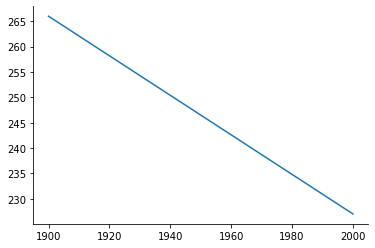

In [105]:
sns.lineplot(x=xs,y=y)

## Probability

### Randomness / uncertainty

In [106]:
error = np.random.normal(size=len(xs))
error

array([ 1.70543719,  2.08004451,  0.71593134,  0.06527988,  0.32645808,
        1.23682486,  0.78206025, -0.33183928, -2.28015108, -1.66520223,
       -0.58913212,  1.29313254,  0.29794015,  1.11275186, -0.09033715,
        0.19367397,  0.08582465,  1.73182332, -1.69603088, -0.63559132,
        0.52824575,  0.02165823, -1.35618656, -0.54684133, -0.16797873,
       -1.56252955,  1.40959989,  0.82874766, -0.3610202 ,  0.72029687,
       -1.60089404, -2.49548284, -1.87592875, -0.7295841 , -0.9664781 ,
        0.43464002, -0.52981933, -0.34427658,  1.74606494,  1.04509496,
       -1.71390965,  1.50662097,  1.1077454 , -2.05027091, -0.28334368,
       -1.13792027,  1.36780786,  0.54045877, -1.2810502 ,  0.33600005,
        0.09084862, -1.83779543,  1.64973437,  2.5246796 ,  0.35465348,
        0.87321651, -0.8579428 , -0.24282551,  0.20211763, -0.27895502,
        0.58026638, -0.53952108,  0.03198565, -0.62759158,  0.72441023,
        0.3368862 , -0.53120871, -1.4820809 ,  0.02278552,  0.58

<AxesSubplot:>

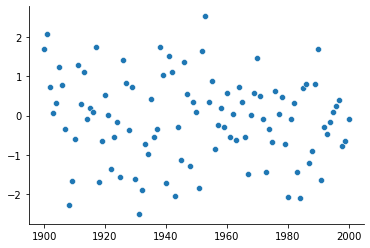

In [107]:
sns.scatterplot(x=xs, y=error)

In [108]:
y2 = 1007 - 0.39 * xs + error

<AxesSubplot:>

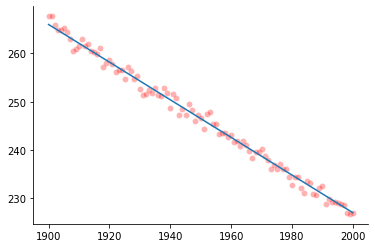

In [109]:
sns.scatterplot(x=xs, y=y2, alpha=0.3, color="red")
sns.lineplot(x=xs, y=y)

### Moment based descriptors of distributions

- mean
- standard deviation / variance


In [110]:
data = np.array([10,15,-5,20,13,7])

Manual implementation of mean and standard deviation

In [111]:
def mymean(data):
    n = len(data)
    return np.sum(data)/n

In [112]:
def mystd(data):
    n = len(data)
    return np.sqrt((1/n)*np.sum((data - np.mean(data))**2))

In [113]:
mymean(data)

10.0

In [114]:
mystd(data)

7.831560082980487

Much better: use functionality provided by `numpy`

In [115]:
np.mean(data), np.std(data)

(10.0, 7.831560082980487)

- skewness 
- kurtosis

In [119]:
skewness = np.mean(((data - np.mean(data)) / np.std(data))**3)
skewness

-0.7807040193779283

In [120]:
kurtosis = np.mean(((data - np.mean(data))/np.std(data))**4)
kurtosis

2.7208766540642717

Much better: use functionality provided by `scipy.stats`

In [121]:
import scipy.stats as stats

In [122]:
stats.skew(data)

-0.7807040193779283

In [123]:
stats.kurtosis(data, fisher=False)

2.720876654064272

### Proability distribution

In [124]:
data

array([10, 15, -5, 20, 13,  7])

<AxesSubplot:ylabel='Count'>

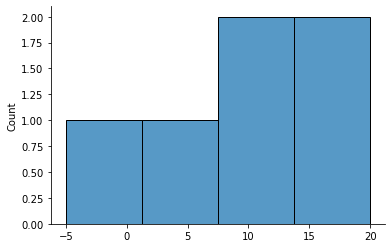

In [125]:
sns.histplot(data)

### Named distribution

Distributions and random variables form distributions can be modelled using `scipy.stats`

- use required distribution, e.g.: `stats.binom(...)`
- pass relevant distribution parameters, e.g. `n` and `p` in case of binomial distribution
- e.g. `mydist = stats.binom(100,0.05)`

- we can then use relevant functions associated with this specific distribution, most common are:
    - `pmf`: probability mass function, i.e. gives the probability for x (discrete variables)
    - `pdf`: probability density function, i.e. gives the probability for x (continuous variables)
    - `cdf`: cumulative probability distribution function, i.e. gives the probability for <= x (discrete & continuous variables)
    - `rvs`: sample random variables from distribution

Example: rvs
```
N = stats.norm(0,1) # standard normal distribution
data = N.rvs(10_000) # 10_000 values from N
```
    
    
    

#### Binomial distribution

We can tediously implement this manually

In [202]:
n = 100 # Roboter
p = 0.05 # Wahrscheinlichkeit
x = 0

comb(n,x)*p**x * (1-p)**(n-x)

0.0059205292203339975

Or write our own function

In [203]:
def bpmf(n,p, x):
    return comb(n,x)*p**x *(1-p)**(n-x)

In [204]:
n = 100
p = 0.05
x = 3

In [205]:
bpmf(n,p,x)

0.13957567793089487

But it is much easier to use existing functionality. 

In our case we can use `scipy.stats`

In [136]:
B = stats.binom(n,p)

We can calculate the probability of a random variable taken the value x using the `pmf` function

In [149]:
probability_of_x = B.pmf(x)
probability_of_x

0.1395756779308903

Much more convenient: we can also use the same logic to calculate the probabilities of many different values for x. Here we calculate the probabilities for x taken values of 0 to 100

In [163]:
xs = np.arange(0,101) # np.array with values 0 to 100
probs = B.pmf(xs) # probability for x=0 to x=100

We can then pass the data to a plot function (here: `sns.barplot`)

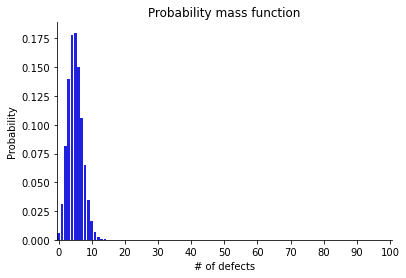

In [189]:
myplot = sns.barplot(x=xs,y=probs, color="blue")
ticks = np.arange(0,101,step=10) # 0,10,20,30...100
myplot.set_xticks(ticks)
myplot.set_xlabel("# of defects")
myplot.set_ylabel("Probability")
myplot.set_title("Probability mass function");

We can also calculate cumulative distribution function. Using the same logic.

In [169]:
cum_probability = B.cdf(xs)

We can then plot the cumulative probabilities. Note that 

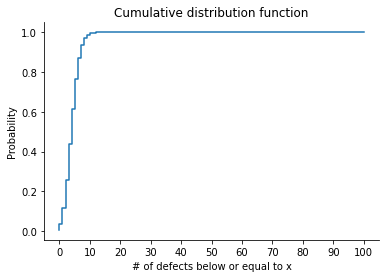

In [183]:
myplot = sns.lineplot(x=xs,y=cum_probability, drawstyle='steps');
myplot.set_xticks(ticks)
myplot.set_xlabel("# of defects below or equal to x")
myplot.set_ylabel("Probability")
myplot.set_title("Cumulative distribution function");

We can simulate data by drawing from the defined distribution. Let's randomly draw 10.000 values form binomial distribution with $n = 100$ and $p=0.05$. 

In [184]:
B = stats.binom(100,0.05)

In [196]:
data = B.rvs(10_000)

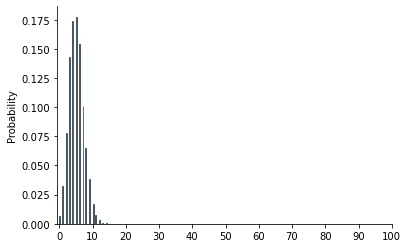

In [197]:
myplot = sns.histplot(data, stat="probability")
myplot.set_xticks(ticks);